In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
eda_covid = pd.read_csv("../1_datasets/final_datasets/final_merged_covid_pm25_sdi.csv")

In [3]:
# Basic info
print(eda_covid.info())
print(eda_covid.describe())
eda_covid.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              190 non-null    object 
 1   COVID_Deaths_Rate    190 non-null    float64
 2   upper                190 non-null    float64
 3   lower                190 non-null    float64
 4   Mean_PM25_2010_2019  190 non-null    float64
 5   Year                 190 non-null    int64  
 6   SDI_mean_value       190 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.5+ KB
None
       COVID_Deaths_Rate         upper         lower  Mean_PM25_2010_2019  \
count       1.900000e+02  1.900000e+02  1.900000e+02           190.000000   
mean        6.570683e+01  8.232673e+01  5.113240e+01            22.641584   
std         5.874725e+01  7.287646e+01  4.743728e+01            14.428675   
min         2.970584e-11  2.970584e-11  2.970584e-11             5.306

,Country,COVID_Deaths_Rate,upper,lower,Mean_PM25_2010_2019,Year,SDI_mean_value
0,Lao People's Democratic Republic,6.867837e-11,6.867837e-11,6.867837e-11,21.164,2020,0.484193
1,Sri Lanka,2.820345e+00,2.820345e+00,2.820345e+00,23.948,2020,0.697649
2,Fiji,8.084884e+00,1.685940e+01,2.008246e+00,7.272,2020,0.671431
3,Samoa,2.370317e-09,2.370317e-09,2.370317e-09,7.623,2020,0.590075
4,Malaysia,1.516114e+00,2.286782e+00,8.061217e-01,21.670,2020,0.738744


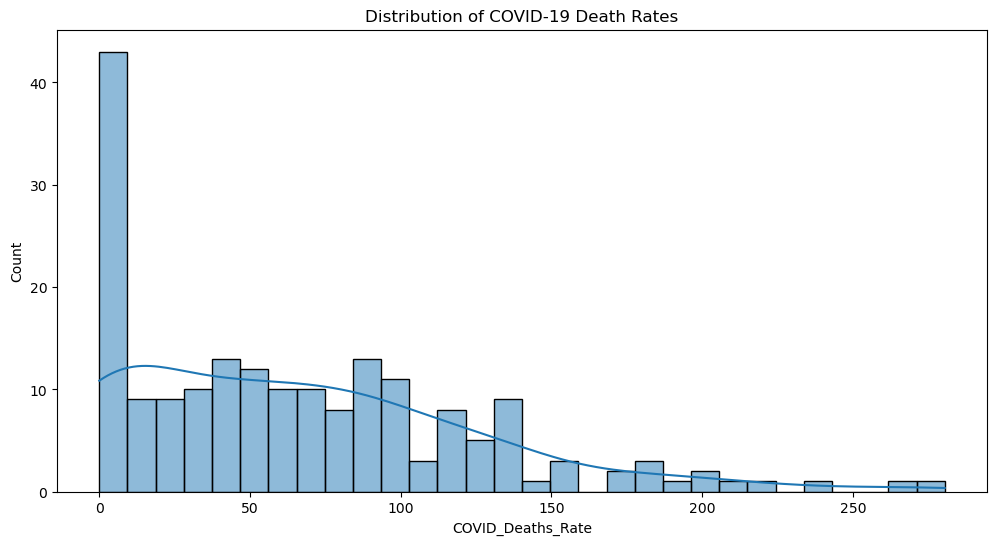

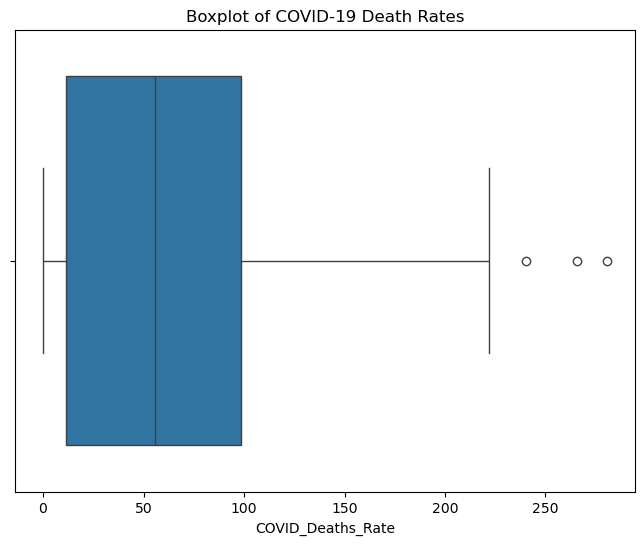

In [4]:
plt.figure(figsize=(12, 6))
sns.histplot(eda_covid["COVID_Deaths_Rate"], kde=True, bins=30)
plt.title("Distribution of COVID-19 Death Rates")
plt.show()

# Boxplot to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=eda_covid["COVID_Deaths_Rate"])
plt.title("Boxplot of COVID-19 Death Rates")
plt.show()

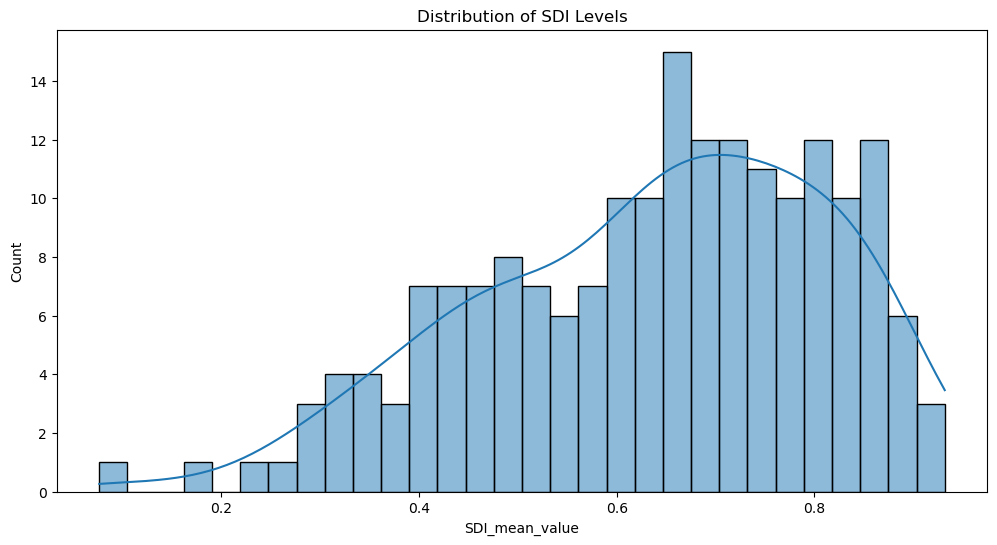

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(eda_covid["SDI_mean_value"], kde=True, bins=30)
plt.title("Distribution of SDI Levels")
plt.show()

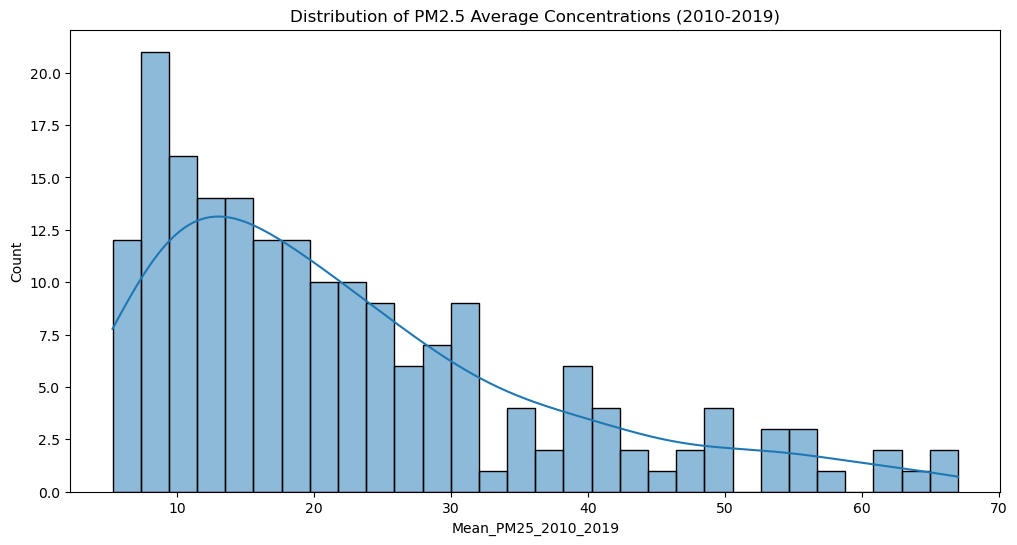

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(eda_covid["Mean_PM25_2010_2019"], kde=True, bins=30)
plt.title("Distribution of PM2.5 Average Concentrations (2010-2019)")
plt.show()

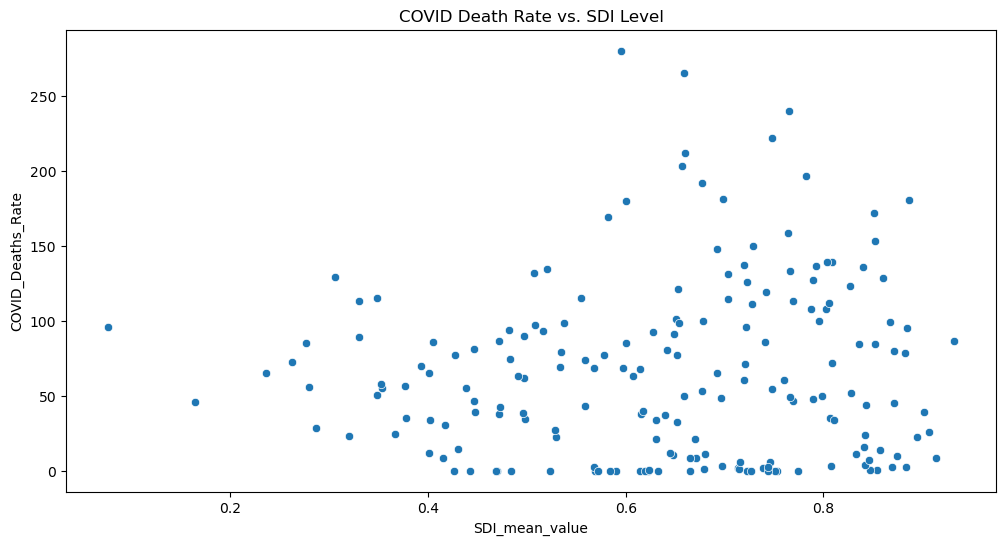

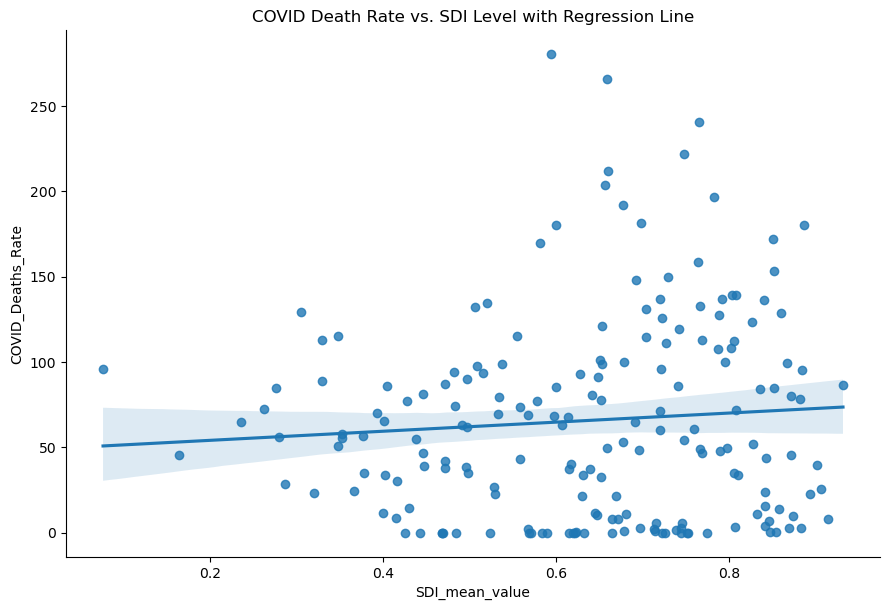

In [7]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="SDI_mean_value", y="COVID_Deaths_Rate", data=eda_covid)
plt.title("COVID Death Rate vs. SDI Level")
plt.show()

# With regression line
sns.lmplot(
    x="SDI_mean_value", y="COVID_Deaths_Rate", data=eda_covid, height=6, aspect=1.5
)
plt.title("COVID Death Rate vs. SDI Level with Regression Line")
plt.show()

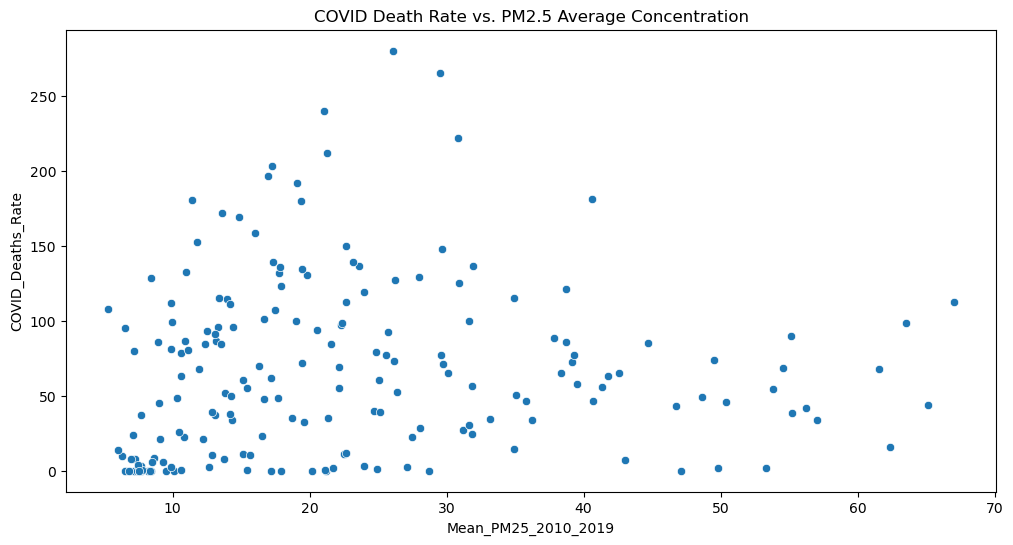

In [8]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Mean_PM25_2010_2019", y="COVID_Deaths_Rate", data=eda_covid)
plt.title("COVID Death Rate vs. PM2.5 Average Concentration")
plt.show()

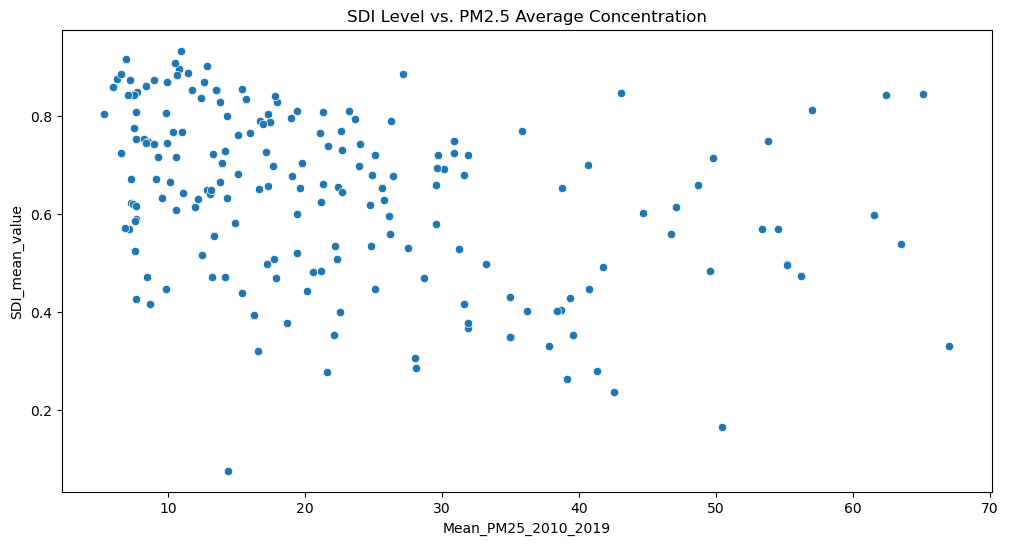

In [9]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Mean_PM25_2010_2019", y="SDI_mean_value", data=eda_covid)
plt.title("SDI Level vs. PM2.5 Average Concentration")
plt.show()

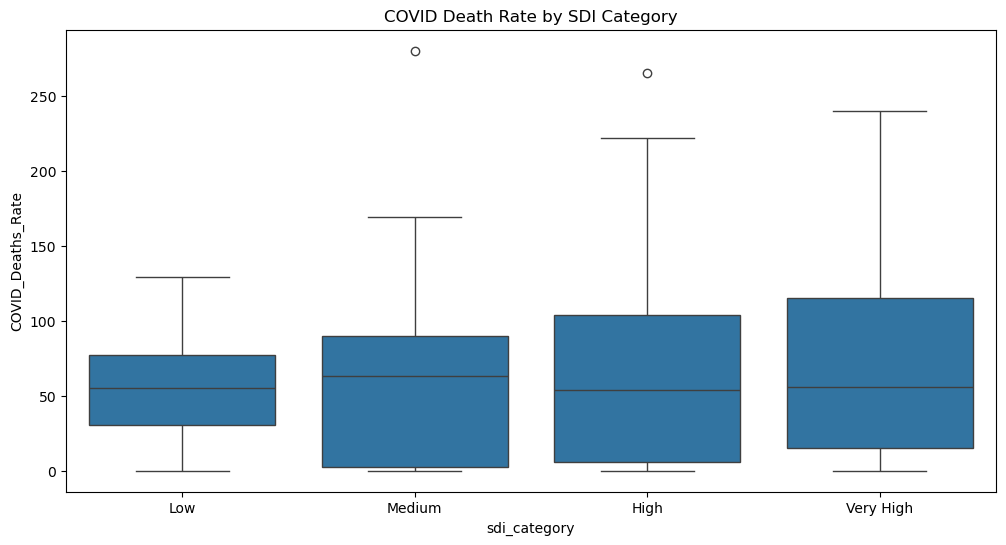

In [10]:
# Create SDI categories (adjust bins as needed)
eda_covid["sdi_category"] = pd.cut(
    eda_covid["SDI_mean_value"],
    bins=[0, 0.45, 0.60, 0.75, 1],
    labels=["Low", "Medium", "High", "Very High"],
)

# Boxplot of COVID death rate by SDI category
plt.figure(figsize=(12, 6))
sns.boxplot(x="sdi_category", y="COVID_Deaths_Rate", data=eda_covid)
plt.title("COVID Death Rate by SDI Category")
plt.show()

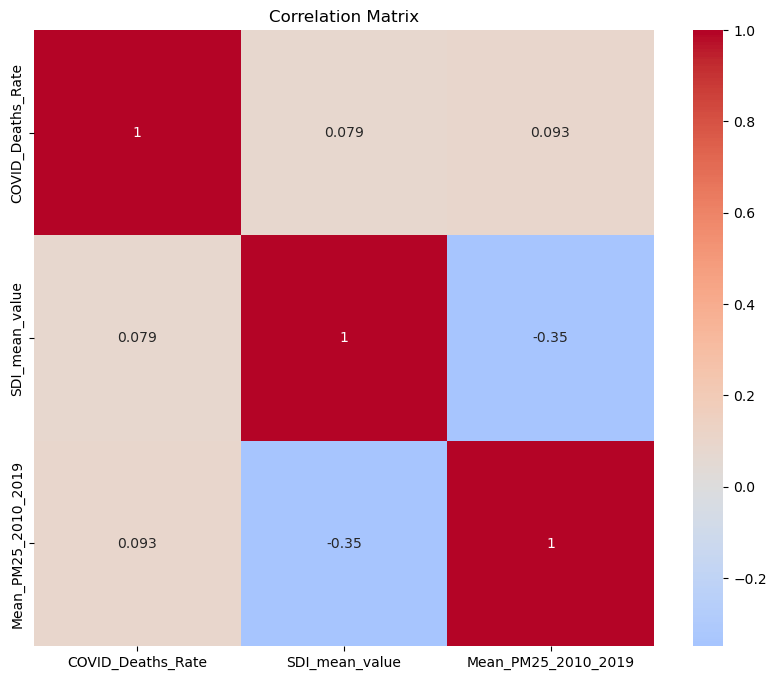

In [11]:
# Calculate correlation matrix
corr_matrix = eda_covid[
    ["COVID_Deaths_Rate", "SDI_mean_value", "Mean_PM25_2010_2019"]
].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

In [12]:
# Summary statistics by SDI category
print(
    eda_covid.groupby("sdi_category")[
        ["COVID_Deaths_Rate", "Mean_PM25_2010_2019"]
    ].describe()
)

C:\Users\hp\AppData\Local\Temp\ipykernel_7964\4080452303.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  eda_covid.groupby("sdi_category")[


             COVID_Deaths_Rate                                                 \
                         count       mean        std           min        25%   
sdi_category                                                                    
Low                       33.0  55.060768  33.270756  3.651418e-10  30.297046   
Medium                    37.0  61.531830  58.406505  2.970584e-11   2.132069   
High                      64.0  67.983842  67.415966  4.714003e-09   5.675625   
Very High                 56.0  72.136583  60.406660  2.764638e-08  15.275588   

                                                Mean_PM25_2010_2019  \
                    50%         75%         max               count   
sdi_category                                                          
Low           55.318861   77.160366  129.212747                33.0   
Medium        63.178170   90.083517  280.451601                37.0   
High          53.565302  103.777305  265.656063                64.0   
Very H

In [13]:
# Top 10 countries by each metric
print("Top 10 countries by COVID death rate:")
print(eda_covid.nlargest(10, "COVID_Deaths_Rate")[["Country", "COVID_Deaths_Rate"]])

print("\nTop 10 countries by PM2.5 concentration:")
print(eda_covid.nlargest(10, "Mean_PM25_2010_2019")[["Country", "Mean_PM25_2010_2019"]])

Top 10 countries by COVID death rate:
                              Country  COVID_Deaths_Rate
19   Bolivia (Plurinational State of)         280.451601
181                              Peru         265.656063
42                           Bulgaria         240.326402
157                   North Macedonia         221.881327
63                             Mexico         212.122870
166                           Ecuador         203.433706
145                           Belarus         196.705914
60                       South Africa         191.813949
12                            Armenia         181.219979
40                         San Marino         180.508426

Top 10 countries by PM2.5 concentration:
          Country  Mean_PM25_2010_2019
97    Afghanistan               67.013
75         Kuwait               65.132
173    Tajikistan               63.496
155         Qatar               62.363
28          Egypt               61.554
161  Saudi Arabia               57.003
152      Cameroon   

In [ ]:
import plotly.express as px

# Create the choropleth map using country names directly
fig = px.choropleth(
    eda_covid,
    locations="Country", 
    locationmode="country names", 
    color="lower",  
    hover_name="Country",
    hover_data=[
        "SDI_mean_value",
        "Mean_PM25_2010_2019",
    ],  
    color_continuous_scale=px.colors.sequential.Plasma,
    title="COVID-19 Death Rate (Lower Estimate) by Country (2020)",
    projection="natural earth",  # Makes the map look more professional
)

fig.update_layout(
    margin={"r": 0, "t": 40, "l": 0, "b": 0},
    coloraxis_colorbar=dict(title="Death Rate", thickness=20),
)

fig.show()